## Funciones de distribución de probabilidades

### Distribución Uniforme

In [1]:
## se caracteriza por generar numeros aleatorios, todos tienen la misma probabilidad

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
a = 1
b = 100
n = 1000000 ## numero de muestras
data = np.random.uniform(a, b, n)

(array([ 99708.,  99952., 100073.,  99795., 100047., 100623.,  99978.,
        100166.,  99500., 100158.]),
 array([ 1.00001487, 10.89995977, 20.79990467, 30.69984958, 40.59979448,
        50.49973938, 60.39968429, 70.29962919, 80.19957409, 90.099519  ,
        99.9994639 ]),
 <a list of 10 Patch objects>)

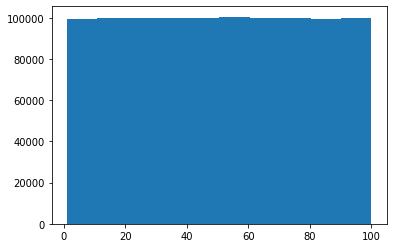

In [5]:
%matplotlib inline
plt.hist(data)

## Distribucion Normal

In [6]:
data = np.random.randn(1000000)

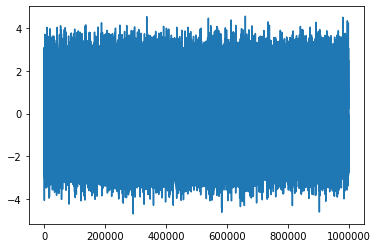

In [8]:
x = range(1,1000001)
plt.plot(x, data)

(array([9.10000e+01, 2.20300e+03, 2.53250e+04, 1.32616e+05, 3.11117e+05,
        3.31596e+05, 1.59385e+05, 3.41560e+04, 3.35700e+03, 1.54000e+02]),
 array([-4.69041351, -3.76669512, -2.84297673, -1.91925834, -0.99553996,
        -0.07182157,  0.85189682,  1.77561521,  2.6993336 ,  3.62305198,
         4.54677037]),
 <a list of 10 Patch objects>)

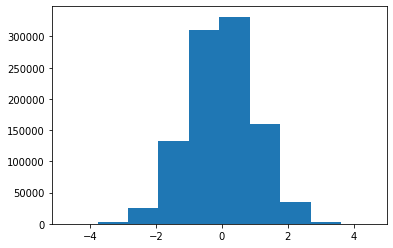

In [9]:
%matplotlib inline
plt.hist(data)

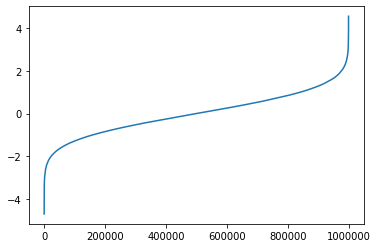

In [10]:
plt.plot(x,sorted(data))

(array([   7.,   55.,  360., 1258., 2629., 2869., 1972.,  709.,  126.,
          15.]),
 array([-4.56609244, -2.64206753, -0.71804262,  1.20598228,  3.13000719,
         5.05403209,  6.978057  ,  8.90208191, 10.82610681, 12.75013172,
        14.67415663]),
 <a list of 10 Patch objects>)

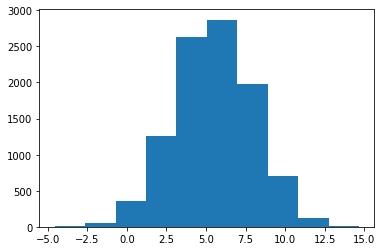

In [11]:
## si se quiere obetenr una distribucion normal con media y desvicacion distinta a 0 y 1
mu = 5.5
sd = 2.5
Z_10000 = np.random.randn(10000)
data = mu + sd * Z_10000 # Z = (X - mu) / sd -> N(0,1), X = mu + sd * Z
plt.hist(data)

In [12]:
data = np.random.randn(2,4)
data

array([[-0.94955046,  0.91082338, -0.42871001, -0.23496719],
       [-0.6578019 , -1.97336203,  1.89055496, -0.36069571]])

## La simulación de Monte Carlo

* Generamos dos números aleatorios uniforme x e y entre 0 y 1 en total 1000 veces.
* Calcularemos $z = x^2 + y^2$:
      * Si z< 1 -> estamos dentro del círculo.
      * Si z >= 1 -> estamos fuera del círculo.
* Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos para obtener una aproximación de la probabilidad de caer dentro del círculo.
* Usamos dicha probabilidad para aproximar el valor de π.
* Repetimos el experimento un número suficiente de veces (por ejemplo 100), para obtener (100) diferentes aproximaciones de π.
* Calculamos el promedio de los 100 experimentos anteriores para dar un valor final de π.



In [13]:
def pi_montecarlo(n, n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z<=1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/n_exp

    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)

3.140684


(3.140684, [<matplotlib.lines.Line2D at 0x99f0dc8>])

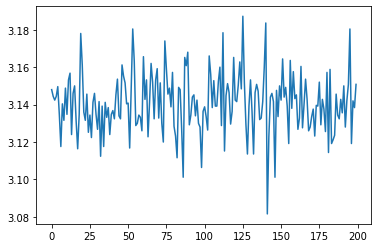

In [14]:
pi_montecarlo(10000, 200)

## Dummy Data Sets

In [15]:
# es una lista o array de numeros aleatorios generados a partir de metodos, de modo q de dicho metodos obtengo un vector columno que pasa a formar parte del dataset.

In [18]:
n = 1000000
# permite transforma un diccionario en un dataframe
data = pd.DataFrame(
    {
        'A' : np.random.randn(n), # distribucion normal con media 0 
        'B' : 1.5 + 2.5 * np.random.randn(n), # distribucion normal con media 1.5
        'C' : np.random.uniform(5, 32, n) # distribucion uniforme
    }
)

In [17]:
data.describe()

A               B               C
count  1000000.000000  1000000.000000  1000000.000000
mean         0.000329        1.497259       18.511600
std          0.999599        2.500916        7.794845
min         -4.874084      -10.405923        5.000001
25%         -0.674196       -0.190457       11.763050
50%          0.000389        1.498369       18.524732
75%          0.675085        3.185456       25.256806
max          4.753356       13.985283       31.999983

(array([4.60000e+01, 1.83900e+03, 2.93030e+04, 1.74669e+05, 3.81753e+05,
        3.08722e+05, 9.28000e+04, 1.04140e+04, 4.44000e+02, 1.00000e+01]),
 array([-4.98031736, -3.93993207, -2.89954677, -1.85916148, -0.81877619,
         0.2216091 ,  1.2619944 ,  2.30237969,  3.34276498,  4.38315028,
         5.42353557]),
 <a list of 10 Patch objects>)

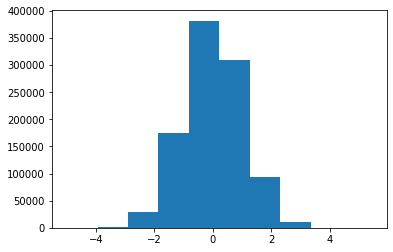

In [19]:
plt.hist(data["A"])

(array([1.70000e+01, 5.99000e+02, 1.38620e+04, 1.11393e+05, 3.30454e+05,
        3.67211e+05, 1.51741e+05, 2.33130e+04, 1.39000e+03, 2.00000e+01]),
 array([-11.74039055,  -9.14723074,  -6.55407094,  -3.96091113,
         -1.36775132,   1.22540849,   3.8185683 ,   6.4117281 ,
          9.00488791,  11.59804772,  14.19120753]),
 <a list of 10 Patch objects>)

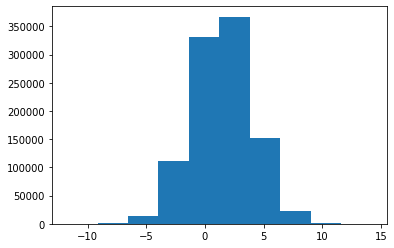

In [21]:
plt.hist(data["B"])

(array([ 99948., 100009.,  99983., 100143., 100153., 100375., 100122.,
        100078.,  99510.,  99679.]),
 array([ 5.00002585,  7.70002107, 10.40001628, 13.10001149, 15.8000067 ,
        18.50000191, 21.19999713, 23.89999234, 26.59998755, 29.29998276,
        31.99997797]),
 <a list of 10 Patch objects>)

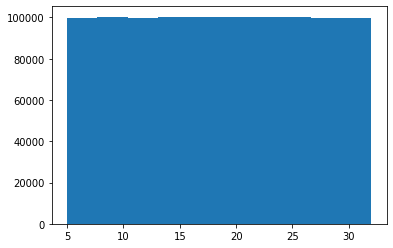

In [22]:
plt.hist(data["C"])

In [23]:
data = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")

In [24]:
data.head()

State  Account Length  Area Code     Phone Int'l Plan VMail Plan  \
0    KS             128        415  382-4657         no        yes   
1    OH             107        415  371-7191         no        yes   
2    NJ             137        415  358-1921         no         no   
3    OH              84        408  375-9999        yes         no   
4    OK              75        415  330-6626        yes         no   

   VMail Message  Day Mins  Day Calls  Day Charge  ...  Eve Calls  Eve Charge  \
0             25     265.1        110       45.07  ...         99       16.78   
1             26     161.6        123       27.47  ...        103       16.62   
2              0     243.4        114       41.38  ...        110       10.30   
3              0     299.4         71       50.90  ...         88        5.26   
4              0     166.7        113       28.34  ...        122       12.61   

   Night Mins  Night Calls  Night Charge  Intl Mins  Intl Calls  Intl Charge  \
0       244.7           91         11.01       10.0           3         2.70   
1       254.4          103         11.45       13.7           3         3.70   
2       162.6          104          7.32       12.2           5         3.29   
3       196.9           89          8.86        6.6           7         1.78   
4       186.9          121          8.41       10.1           3         2.73   

   CustServ Calls  Churn?  
0               1  False.  
1               1  False.  
2               0  False.  
3               2  False.  
4               3  False.  

[5 rows x 21 columns]

In [25]:
colum_names = data.columns.values.tolist()

In [26]:
a = len(colum_names)
a

21

In [27]:
new_data = pd.DataFrame(
    {
        'Column Name': colum_names,
        'A' : np.random.randn(a),
        'B' : np.random.uniform(0,1,a)
    }, index = range(42, 42 + a) # si quiero q el index no empiece desde 0
)

In [28]:
new_data

Column Name         A         B
42           State  0.979702  0.393313
43  Account Length  0.435256  0.263929
44       Area Code -1.146081  0.228507
45           Phone  0.181362  0.535298
46      Int'l Plan  0.195542  0.352735
47      VMail Plan  2.263892  0.994035
48   VMail Message -0.850444  0.672877
49        Day Mins  1.277623  0.297479
50       Day Calls  0.227983  0.745252
51      Day Charge  0.490834  0.142493
52        Eve Mins  0.607088  0.855091
53       Eve Calls -0.504768  0.636334
54      Eve Charge  0.774813  0.065386
55      Night Mins -0.357947  0.233606
56     Night Calls  0.193479  0.124101
57    Night Charge -0.669243  0.958997
58       Intl Mins -0.304761  0.377823
59      Intl Calls  0.202863  0.649655
60     Intl Charge  0.877750  0.811933
61  CustServ Calls  1.013361  0.837073
62          Churn?  1.314300  0.509089